In [1]:
import argparse
import numpy as np
import os
import pandas as pd
import plotly.express as px
from IPython.display import display

pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

,data,method,params,mrae
19,lequa2024_val,EMaxL,{'base_estimator__C': 0.31622776601683794},1.147293
20,lequa2024_val,EMaxL,{'base_estimator__C': 1.0},1.175605
10,lequa2024_val,SLD,{'classifier__C': 0.31622776601683794},1.188196
11,lequa2024_val,SLD,{'classifier__C': 1.0},1.214302
21,lequa2024_val,EMaxL,{'base_estimator__C': 3.1622776601683795},1.304815
12,lequa2024_val,SLD,{'classifier__C': 3.1622776601683795},1.342250
18,lequa2024_val,EMaxL,{'base_estimator__C': 0.1},1.396897
2,lequa2024_val,PACC,{'transformer__classifier__estimator__C': 1.0},1.408611
9,lequa2024_val,SLD,{'classifier__C': 0.1},1.433657
1,lequa2024_val,PACC,{'transformer__classifier__estimator__C': 0.31622776601683794},1.455602


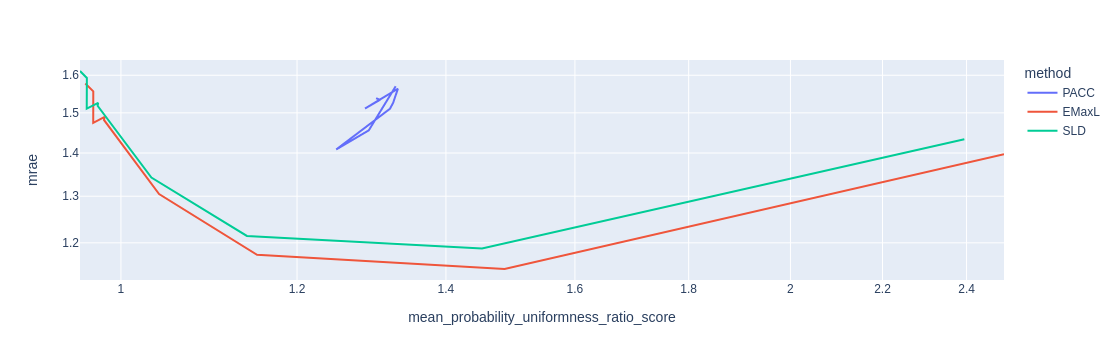

In [115]:
def join_C(df):
    C = df["transformer__classifier__estimator__C"][:]
    C[np.isnan(C)] = df["classifier__C"]
    C[np.isnan(C)] = df["base_estimator__C"]
    return C

def plot_proper(val_path):
    df = pd.read_csv(val_path, index_col=0) # read the results
    display(df[["data", "method", "params", "mrae"]].sort_values("mrae"))
    df["C"] = join_C(df) # for sorting
    fig = px.line(
        df.sort_values("C"),
        x = "mean_probability_uniformness_ratio_score",
        y = "mrae",
        color = "method",
        hover_data = ["method", "params"],
        log_x = True,
        log_y = True,
    )
    fig.show()

plot_proper("results/results_lequa2022_proper.csv")

In [116]:
plot_proper("results/results_lequa2022_reg.csv")

,data,method,params,mrae
22,lequa2024_val,EMaxL,"{'tau': 1e-05, 'base_estimator__C': 0.46415888336127786}",1.136742
12,lequa2024_val,EMaxL,"{'tau': 0.001, 'base_estimator__C': 0.46415888336127786}",1.137000
2,lequa2024_val,EMaxL,"{'tau': 0.1, 'base_estimator__C': 0.46415888336127786}",1.163584
23,lequa2024_val,EMaxL,"{'tau': 1e-05, 'base_estimator__C': 1.0}",1.175628
13,lequa2024_val,EMaxL,"{'tau': 0.001, 'base_estimator__C': 1.0}",1.175854
21,lequa2024_val,EMaxL,"{'tau': 1e-05, 'base_estimator__C': 0.21544346900318834}",1.193278
11,lequa2024_val,EMaxL,"{'tau': 0.001, 'base_estimator__C': 0.21544346900318834}",1.193459
3,lequa2024_val,EMaxL,"{'tau': 0.1, 'base_estimator__C': 1.0}",1.201247
1,lequa2024_val,EMaxL,"{'tau': 0.1, 'base_estimator__C': 0.21544346900318834}",1.217557
24,lequa2024_val,EMaxL,"{'tau': 1e-05, 'base_estimator__C': 2.1544346900318834}",1.255667


KeyError: 'transformer__classifier__estimator__C'

,data,method,params,mrae
30,lequa2024_val,SLD,"{'classifier__n_features': (256,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'tanh'}",1.386952
21,lequa2024_val,SLD,"{'classifier__n_features': (512,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'tanh'}",1.410730
8,lequa2024_val,SLD,"{'classifier__n_features': (256, 256), 'classifier__lr_init': 0.001, 'classifier__batch_size': 128, 'classifier__activation': 'relu'}",1.439963
22,lequa2024_val,SLD,"{'classifier__n_features': (512,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'sigmoid'}",1.441163
6,lequa2024_val,SLD,"{'classifier__n_features': (256, 256), 'classifier__lr_init': 0.001, 'classifier__batch_size': 128, 'classifier__activation': 'tanh'}",1.441248
41,lequa2024_val,SLD,"{'classifier__n_features': (128,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'relu'}",1.448366
31,lequa2024_val,SLD,"{'classifier__n_features': (256,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'sigmoid'}",1.449271
32,lequa2024_val,SLD,"{'classifier__n_features': (256,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'relu'}",1.473905
40,lequa2024_val,SLD,"{'classifier__n_features': (128,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'sigmoid'}",1.474009
39,lequa2024_val,SLD,"{'classifier__n_features': (128,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'tanh'}",1.530518


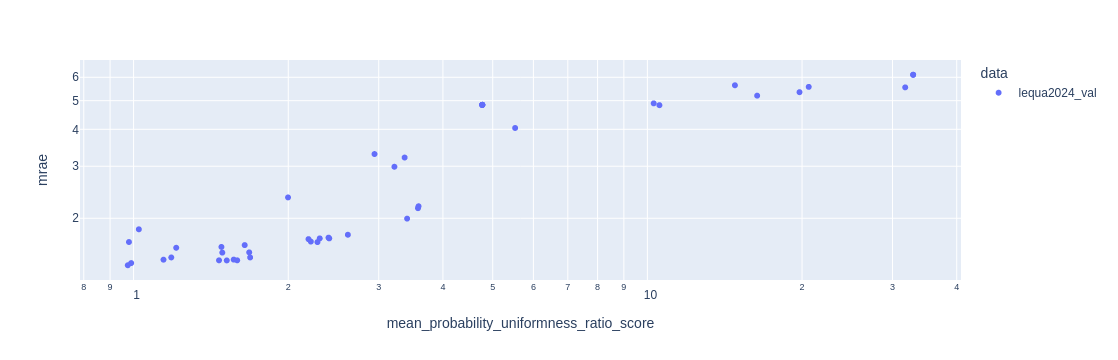

In [85]:
def plot_neural(val_path):
    df = pd.read_csv(val_path, index_col=0) # read the results
    display(df[["data", "method", "params", "mrae"]].sort_values("mrae"))
    # display(df)
    fig = px.scatter(
        df,
        x = "mean_probability_uniformness_ratio_score",
        y = "mrae",
        color = "data",
        hover_data = ["method", "params"],
        log_x = True,
        log_y = True,
    )
    fig.show()

plot_neural("results/val_lequa2022_01.csv")

loss_trn                                                                                                                            0.722895
loss_val                                                                                                                            0.899342
acc_val                                                                                                                                0.735
time                                                                                                                               35.452909
params      {'classifier__n_features': (256,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'tanh'}
method                                                                                                                                   SLD
data                                                                                                                           lequa2024_val
Name: 500, dt

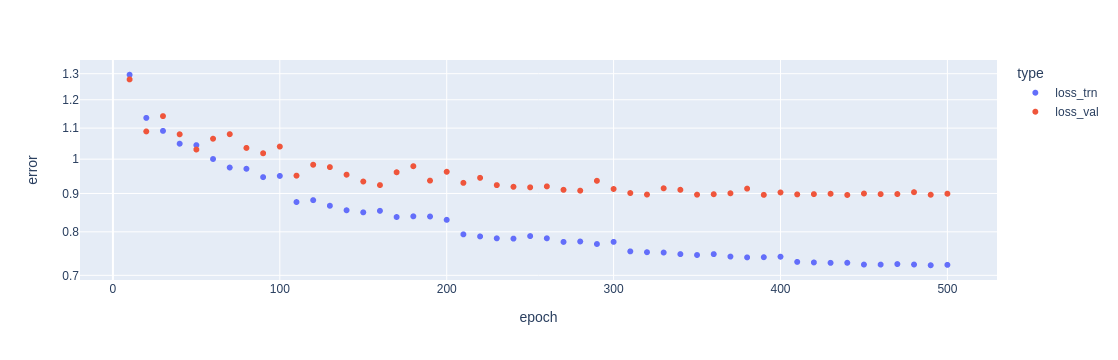

In [92]:
def plot_progress(trn_path, params):
    df = pd.read_csv(trn_path, index_col=0) # read the results
    df = df[df["params"] == params].set_index("epoch")
    display(df.iloc[-1])
    df = df[["loss_trn", "loss_val"]].stack(future_stack=True) # actually a Series, not a df
    df.index.rename({None: "type"}, inplace=True)
    df = df.rename("error").to_frame().reset_index(drop=False)
    # display(df)
    fig = px.scatter(
        df,
        x = "epoch",
        y = "error",
        color = "type",
        log_y = True,
    )
    fig.show()

plot_progress(
    "results/trn_lequa2022_01.csv",
    "{'classifier__n_features': (256,), 'classifier__lr_init': 0.01, 'classifier__batch_size': 128, 'classifier__activation': 'tanh'}"
)

,data,method,params,mrae
1,lequa2024_val,PACC,"{'transformer__classifier__estimator__n_features': (512,), 'transformer__classifier__estimator__lr_init': 0.01, 'transformer__classifier__estimator__batch_size': 128, 'transformer__classifier__estimator__activation': 'tanh'}",1.293866
2,lequa2024_val,PACC,"{'transformer__classifier__estimator__n_features': (256,), 'transformer__classifier__estimator__lr_init': 0.01, 'transformer__classifier__estimator__batch_size': 128, 'transformer__classifier__estimator__activation': 'tanh'}",1.316190
0,lequa2024_val,PACC,"{'transformer__classifier__estimator__n_features': (256, 256), 'transformer__classifier__estimator__lr_init': 0.01, 'transformer__classifier__estimator__batch_size': 128, 'transformer__classifier__estimator__activation': 'tanh'}",1.362024
3,lequa2024_val,PACC,"{'transformer__classifier__estimator__n_features': (128,), 'transformer__classifier__estimator__lr_init': 0.01, 'transformer__classifier__estimator__batch_size': 128, 'transformer__classifier__estimator__activation': 'tanh'}",1.461997


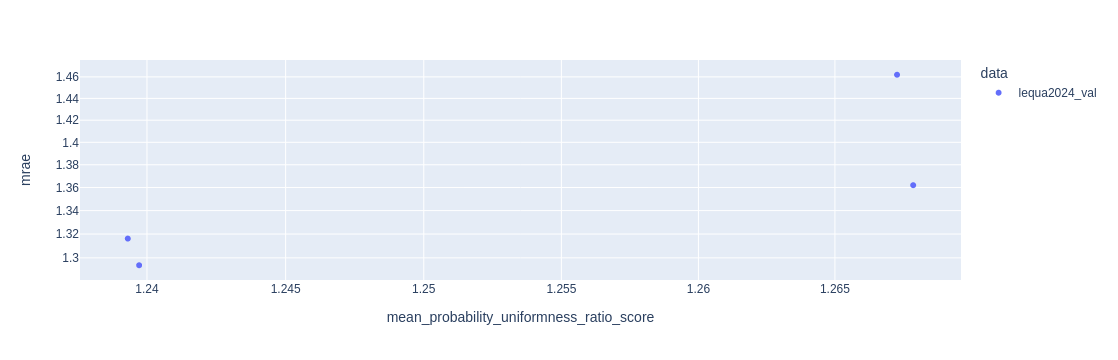

In [94]:
# a similar experiment for PACC instead of SLD
plot_neural("results/val_lequa2022_02.csv")